In [84]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [85]:
import numpy as np
import pandas as pd

In [86]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [37]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [38]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [10]:
DF = pd.DataFrame(engine.execute('SELECT * FROM measurement').fetchall(),columns = ['id','station','date','prcp', 'tobs'])

In [11]:
DF.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [14]:
date_list = []

for d in DF['date']:
    if d >= '2016-08-24' and d <= '2017-08-23':
        date_list.append(d) 

In [15]:
dates = pd.DataFrame(date_list)
dates.rename(columns={0:'date'}, inplace = True)
dates.head()

,date
0,2016-08-24
1,2016-08-25
2,2016-08-26
3,2016-08-27
4,2016-08-28


# Exploratory Climate Analysis

In [12]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [54]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
meas = Base.classes.measurement

In [55]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [267]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01')

In [154]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

### Activity 1: Design a query to retrieve the last 12 months of precipitation data and plot the results

In [13]:
# Data ends at 2017-08-23 thus 2016-08-24 will be the first day considering 12-month period
df_1 = pd.read_sql('select * from measurement where id >2364 ', engine)
df_1.head()

,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0


### Activity 2: Calculate the date 1 year ago from the last data point in the database

In [14]:
# the date 1-year ago is 2016-08-23
pd.read_sql('select * from measurement where id = 2364 or id = 5091 or id = 7331 or id =8825 or id = 11851 or id =14608 or id = 19202', engine)

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,5091,USC00513117,2016-08-23,0.15,76.0
2,7331,USC00514830,2016-08-23,0.05,80.0
3,8825,USC00517948,2016-08-23,NaN,80.0
4,11851,USC00519523,2016-08-23,0.02,80.0
5,14608,USC00519281,2016-08-23,1.79,77.0
6,19202,USC00516128,2016-08-23,0.70,74.0


### Activity 3: Perform a query to retrieve the data and precipitation scores, save the query results as a Pandas DataFrame and set the index to the date colum, and create a group based on the values in the 'maker' column

In [15]:
date_group = pd.DataFrame(df_1.groupby('date')['prcp'].sum())
date_group.head()

,prcp
date,
2010-01-01,0.98
2010-01-02,0.02
2010-01-03,0.00
2010-01-04,0.01
2010-01-05,0.03


### Activity 4: Sort the dataframe by date

In [16]:
df1 = pd.read_sql('select * from measurement order by date desc', engine)
df1.head()

,id,station,date,prcp,tobs
0,2724,USC00519397,2017-08-23,0.00,81.0
1,7635,USC00514830,2017-08-23,0.00,82.0
2,12187,USC00519523,2017-08-23,0.08,82.0
3,19550,USC00516128,2017-08-23,0.45,76.0
4,2723,USC00519397,2017-08-22,0.00,82.0


### Activity 5: Create a temperature Bar Chart

In [91]:
dt = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date > '2017-05-23').\
    order_by(Measurement.date).all()

In [92]:
dt_adj = pd.DataFrame(dt)
dt_adj.head()

,date,prcp
0,2017-05-24,0.13
1,2017-05-24,0.58
2,2017-05-24,0.10
3,2017-05-24,0.61
4,2017-05-24,0.30


In [93]:
X = dt_adj.groupby('date')['prcp'].sum()
X.head()

date
2017-05-24    3.89
2017-05-25    2.22
2017-05-26    0.02
2017-05-27    0.51
2017-05-28    0.41
Name: prcp, dtype: float64

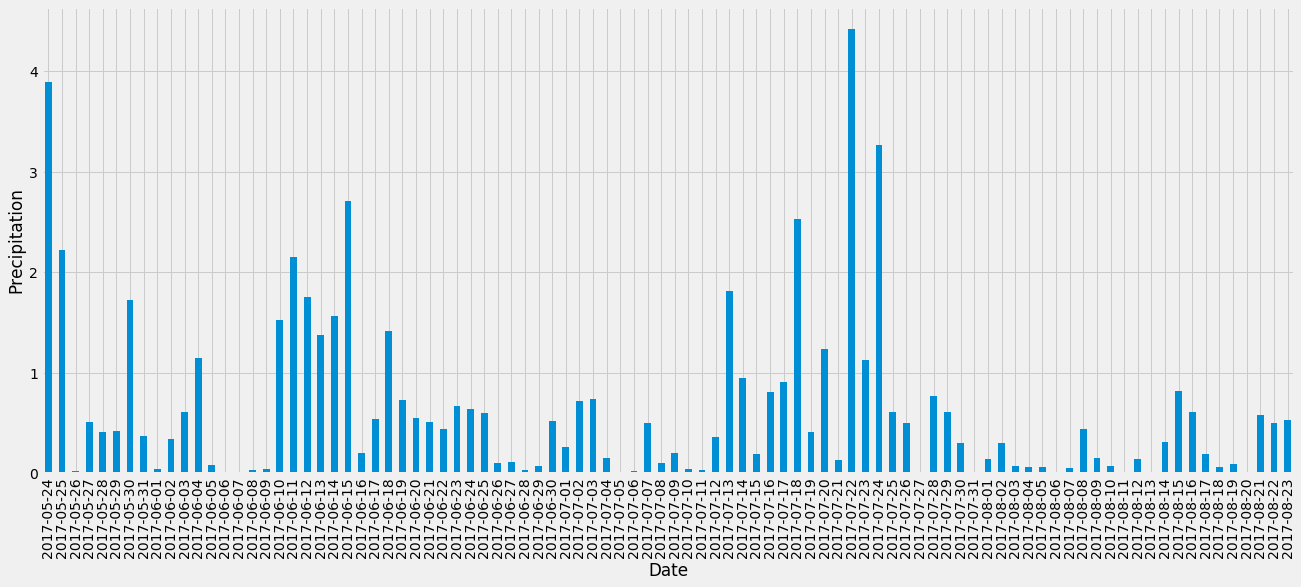

<Figure size 432x288 with 0 Axes>

In [98]:
# Create a bar chart based off of the group series from before
plt.figure(figsize=(20,8))
bar_chart = X.plot(kind='bar', yticks = None)

x_axis = np.arange(len(X))
# Set the xlabel and ylabel using class methods
bar_chart.set_xlabel("Date")
bar_chart.set_ylabel("Precipitation")
#plt.bar(x_axis, X, color='r', alpha=0.5, align="edge")
#plt.legend(handles=[bar_chart], loc="best")

plt.show()
plt.tight_layout()

### Activity 6: Use Pandas to calcualte the summary statistics for the precipitation data

In [139]:
pcrp_desc = dt_adj[['prcp']]
pcrp_desc.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


### Activity 7: Choose the station with the highest number of temperature observations. Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [65]:
dt1 = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()

In [67]:
Y = pd.DataFrame(dt1)

Text(0.5, 0, 'tobs')

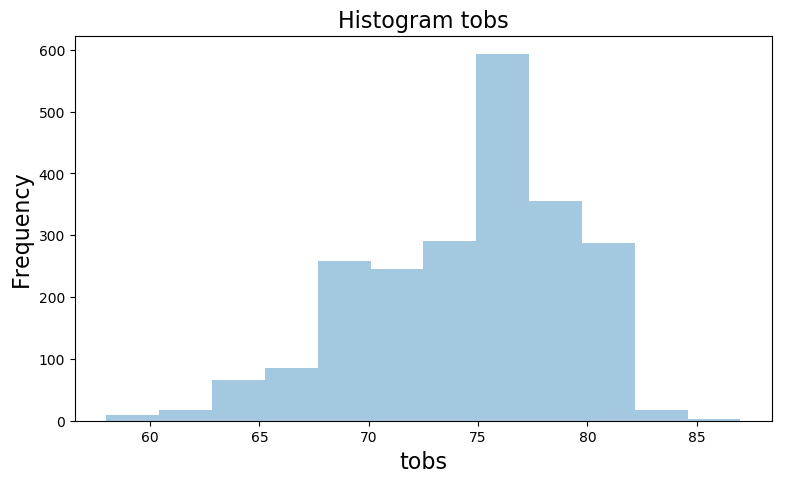

In [162]:
import seaborn as sns
plt.figure(figsize=(9,5))
sns.distplot(Y['tobs'].dropna(),kde=False,bins=12)
plt.title("Histogram tobs", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.xlabel("tobs", fontsize=16)

### Activity 8: Design a query to show how many stations are available in this dataset

In [157]:
pd.read_sql('select count(station) from station', engine)

,count(station)
0,9


### Activity 9: What are the most active stations? (i.e. what stations have the most rows)?List the stations and the counts in descending order.

In [43]:
station_group = pd.DataFrame(pd.read_sql('select station, id from measurement order by id desc', engine).groupby('station')['id'].count())
station_group

,id
station,
USC00511918,1979
USC00513117,2709
USC00514830,2202
USC00516128,2612
USC00517948,1372
USC00518838,511
USC00519281,2772
USC00519397,2724
USC00519523,2669


### Activity 10: Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station

In [156]:
station_min = pd.DataFrame(pd.read_sql('select station, tobs from measurement order by id desc', engine).groupby('station')['tobs'].min())
station_avg = pd.DataFrame(pd.read_sql('select station, tobs from measurement order by id desc', engine).groupby('station')['tobs'].mean())
station_max = pd.DataFrame(pd.read_sql('select station, tobs from measurement order by id desc', engine).groupby('station')['tobs'].max())
station = pd.concat([station_min,station_avg,station_max], axis =1).loc['USC00519281']
station

tobs    54.000000
tobs    71.663781
tobs    85.000000
Name: USC00519281, dtype: float64

### Activity 11: Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax for your trip using the previous year's data for those same dates.

In [88]:

def calc_temps(start_date, end_date):
    """ This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' and 
    return the minimum, average, and maximum temperatures for that range of dates
    
    TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2011-02-28', '2011-03-05'))

[(61.0, 69.75510204081633, 75.0)]


In [48]:
t = calc_temps('2011-02-28', '2011-03-05')

### Activity 12: Plot the results from your previous query as a bar chart, use "Trip Avg Temp" as your Title, use the average temperature for the y value, use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

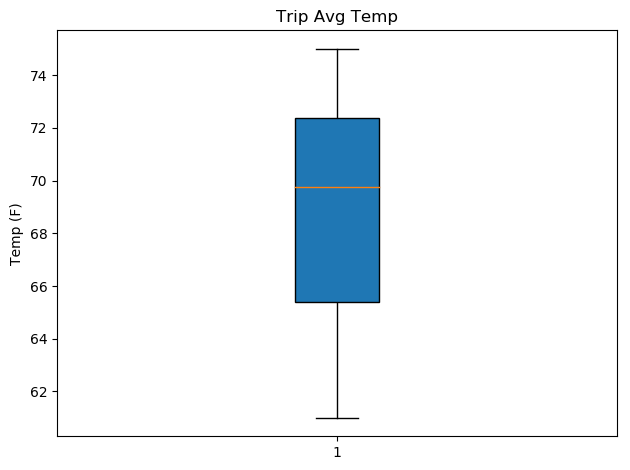

In [81]:
import numpy as np

fig, ax = plt.subplots() 

x = range(len(t))
ax.boxplot(t, patch_artist=True)
ax.set_title('Trip Avg Temp')
plt.ylabel('Temp (F)')
fig.tight_layout()
plt.show()

### Activity 13: Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates. Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [56]:
df_s = pd.DataFrame(pd.read_sql('select * from station', engine))
df_s.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [82]:
df_m = session.query(Measurement.station, Measurement.date, Measurement.tobs, Measurement.prcp).\
    filter(Measurement.date > '2017-08-17').\
    order_by(Measurement.date).all()
df_m = pd.DataFrame(df_m)

In [83]:
#Assumption: Vacation days started at 2017-08-17
df_merged = pd.merge(df_m,df_s, how = 'inner',on = 'station')
df_merged

,station,date,tobs,prcp,id,name,latitude,longitude,elevation
0,USC00519397,2017-08-18,80.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,USC00519397,2017-08-19,79.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
2,USC00519397,2017-08-20,81.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
3,USC00519397,2017-08-21,81.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
4,USC00519397,2017-08-22,82.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
5,USC00519397,2017-08-23,81.0,0.00,1,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
6,USC00514830,2017-08-18,77.0,0.00,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
7,USC00514830,2017-08-19,80.0,0.00,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
8,USC00514830,2017-08-20,80.0,0.01,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
9,USC00514830,2017-08-21,79.0,0.02,3,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0


## Optional Challenge Assignment (Pending)

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


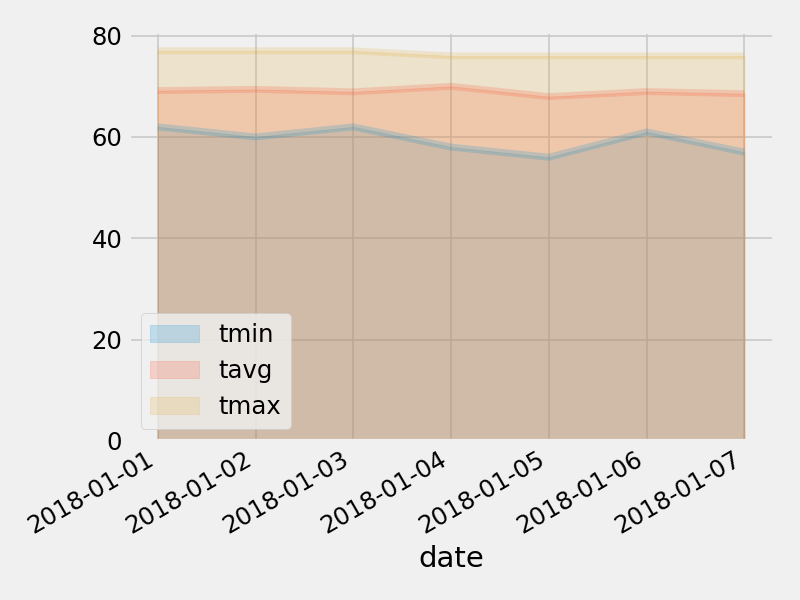

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
